In [205]:
import numpy as np 
import pandas as pd 


import seaborn as sns
import matplotlib.pyplot as plt

**Data Cleaning**

In [206]:
init_data = pd.read_csv("..\Dataset\winemag-data-130k-v2.csv")

In [207]:
init_data.shape

(129971, 14)

In [208]:
init_data = init_data.dropna(subset=['country', 'province', 'variety'])
init_data = init_data.drop(columns=['Unnamed: 0', 'region_2', 'taster_twitter_handle'])
init_data[['designation', 'region_1','taster_name']] = init_data[['designation', 'region_1','taster_name']].fillna('Unknown')
init_data = init_data.dropna(subset='price')
init_data = init_data.drop_duplicates()

In [209]:
init_data.duplicated().sum()

0

In [210]:
init_data.isna().sum()

country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
taster_name    0
title          0
variety        0
winery         0
dtype: int64

In [211]:
init_data.shape

(111537, 11)

**Exploratory Data Analysis**

In [212]:
import plotly.express as px
min_price = init_data['price'].min()
max_price = init_data['price'].max()

Create a word cloud from the descriptions

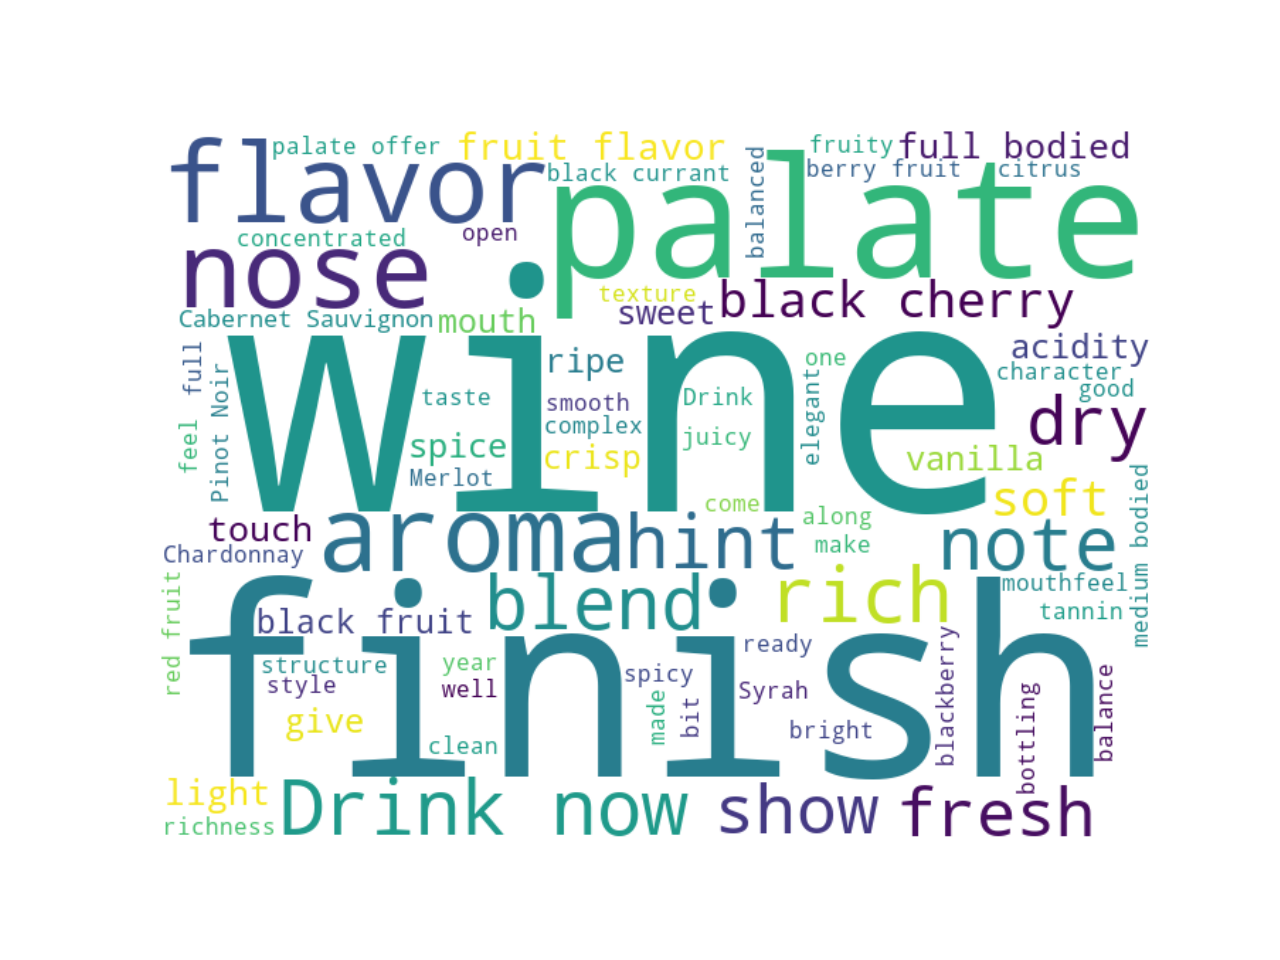

In [213]:
import matplotlib.pyplot as plt
import wordcloud
text = init_data["description"].tolist()
wx = wordcloud.WordCloud(max_words=75,background_color="white",width=700,height=500).generate(" ".join(text))

plt.imshow(wx, interpolation="bilinear")
plt.axis("off")
plt.show()

The code generates a bar plot showing the top 5 varieties of wine based on their count

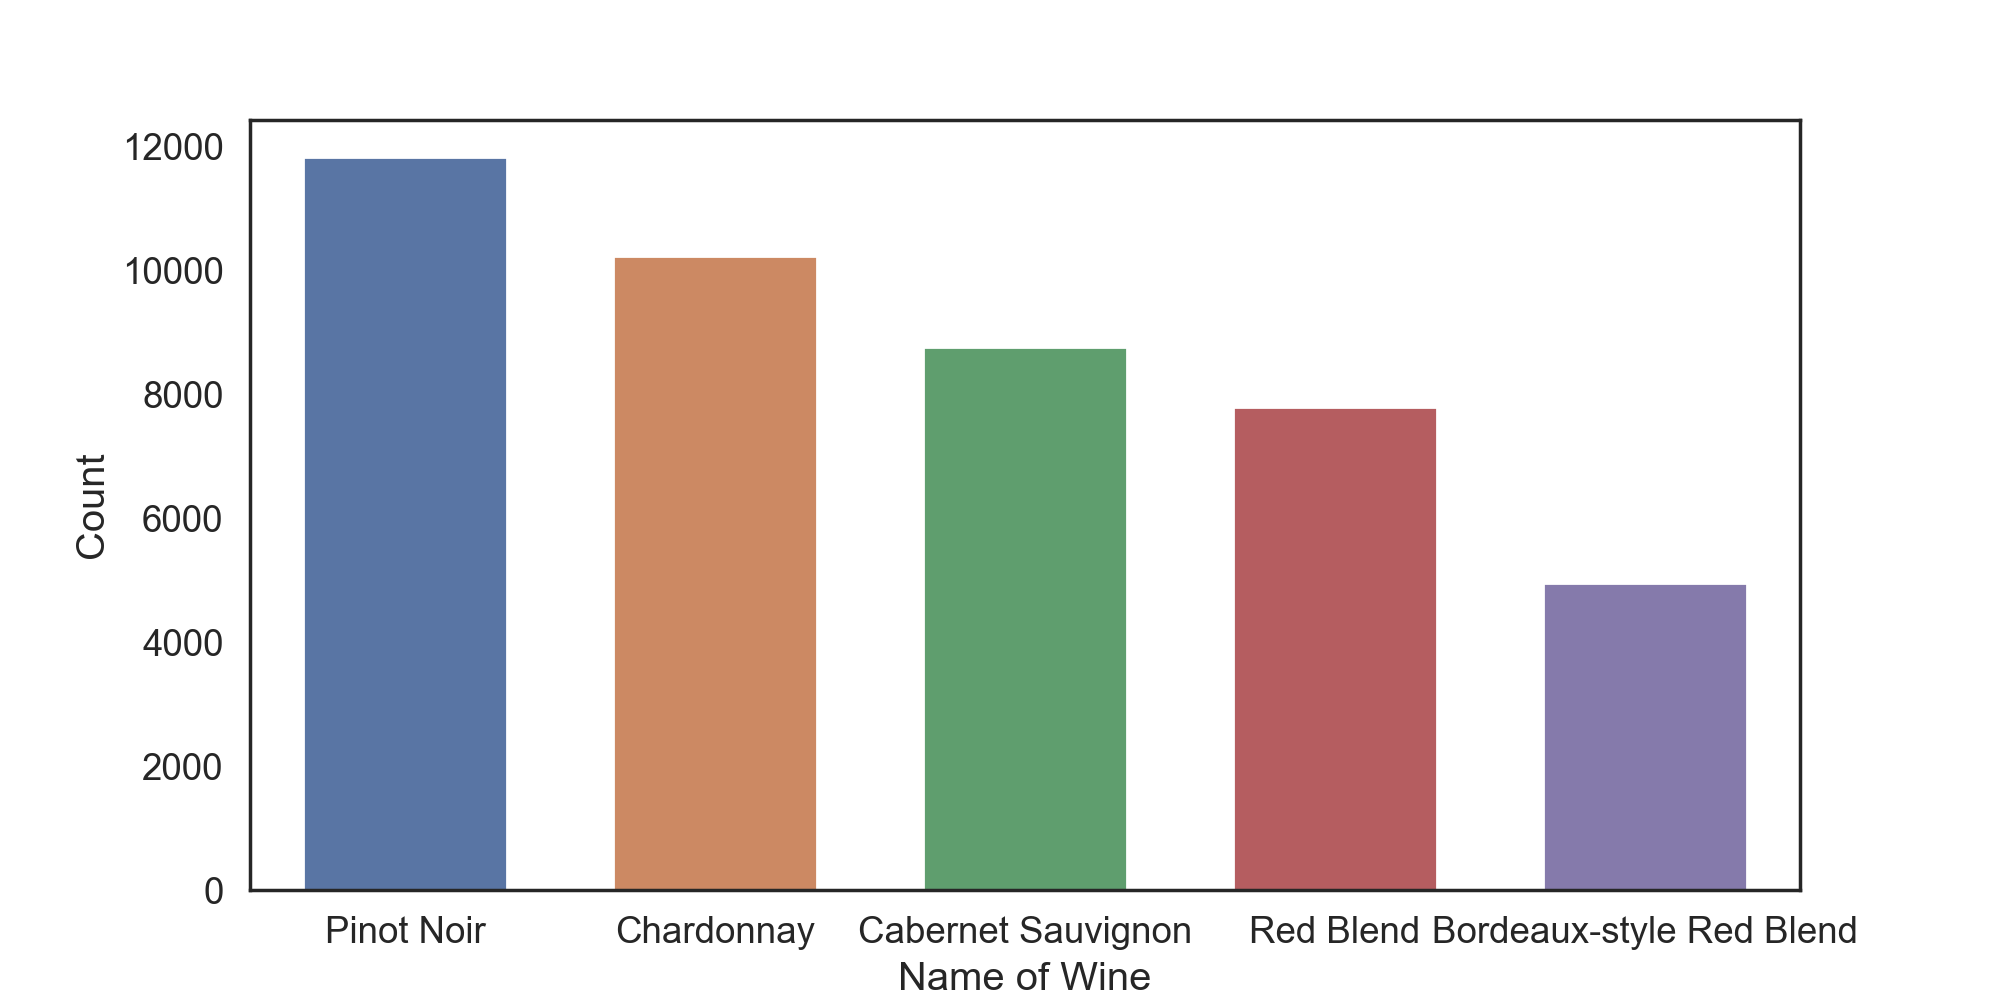

In [229]:
type_counts = init_data['variety'].value_counts().reset_index()
type_counts.columns = ['variety', 'n']
tc=type_counts.head(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=tc['variety'],y=tc['n'],width=0.66)
plt.xlabel('Name of Wine')
plt.ylabel('Count')
plt.show()

Addition of two new features : Flavor Complexity and Flavor Profile 

In [ ]:
import re
recommenderdf = init_data[["title",
                          "winery",
                           "country",
                           "region_1",
                           "variety",
                           "price",
                           "points",
                           "taster_name",
                           "description"]]

# Floral flavor
floral = re.compile(r"iris|peony|elderflower|acacia|lilac|jasmine|honeysuckle|violet|lavender|rose|potpourri|hibiscus|floral")

# Citrus flavor
citrus = re.compile(r"lime|lemon|grapefruit|orange|marmalade|citrus")

# Tree fruit
tree_fruit = re.compile(r"quince|apple|pear|nectarine|peach|apricot|persimmon")

# Tropical fruit
tropical_fruit = re.compile(r"pineapple|mango|guava|kiwi|lychee|tropical")

# Red fruit
red_fruit = re.compile(r"cranberry|pomegranate|cherry|strawberry|raspberry")

# Black fruit
black_fruit = re.compile(r"boysenberry|currant|plum|blackberry|blueberry|olive")

# Spice
spice = re.compile(r"pepper|cinnamon|anise|fennel|eucayptus|mint|thyme|sage|spice")

# Earthy flavor
earthy = re.compile(r"petroleum|volcanic|beet|soil|gravel|slate|clay|earth|earthy")

# Oak flavor
oak = re.compile(r"dill|smoke|cigar|baking|coconut|vanilla|^oak$")

# Aged flavor
aged = re.compile(r"leather|cocoa|coffee|tabacco|nuts")

# Microbial flavor
microbial = re.compile(r"mushroom|truffle|lager|sourdough|cream|butter")

recommenderdf["floral"] = recommenderdf["description"].apply(lambda x: "Floral, " if re.search(floral, x) else "")
recommenderdf["citrus"] = recommenderdf["description"].apply(lambda x: "Citrus, " if re.search(citrus, x) else "")
recommenderdf["tropical_fruit"] = recommenderdf["description"].apply(lambda x: "Tropical Fruit(s), " if re.search(tropical_fruit, x) else "")
recommenderdf["red_fruit"] = recommenderdf["description"].apply(lambda x: "Red Fruit(s), " if re.search(red_fruit, x) else "")
recommenderdf["black_fruit"] = recommenderdf["description"].apply(lambda x: "Black Fruit(s), " if re.search(black_fruit, x) else "")
recommenderdf["spice"] = recommenderdf["description"].apply(lambda x: "Spice(s), " if re.search(spice, x) else "")
recommenderdf["earthy"] = recommenderdf["description"].apply(lambda x: "Earthy, " if re.search(earthy, x) else "")
recommenderdf["oak"] = recommenderdf["description"].apply(lambda x: "Oak Aging, " if re.search(oak, x) else "")
recommenderdf["aged"] = recommenderdf["description"].apply(lambda x: "Aging Flavors, " if re.search(aged, x) else "")
recommenderdf["microbial"] = recommenderdf["description"].apply(lambda x: "Microbials, " if re.search(microbial, x) else "")

recommenderdf["flavorProfile"] = recommenderdf.apply(lambda row: "".join(row[["floral", "citrus", "tropical_fruit", "red_fruit", "black_fruit", "spice", "earthy", "oak", "aged", "microbial"]]), axis=1)
recommenderdf["flavorProfile"] = recommenderdf["flavorProfile"].str.rstrip(", ")
recommenderdf = recommenderdf[recommenderdf["flavorProfile"] != ""]
recommenderdf["flavorComplexity"] = recommenderdf["flavorProfile"].str.count(",") + 1
recommenderdf.drop(columns=["floral", "citrus", "tropical_fruit", "red_fruit", "black_fruit", "spice", "earthy", "oak", "aged", "microbial"], inplace=True)


Finding correlation between Points, Flavor Complexity and Price

In [231]:
correlation_coefficient1 = np.corrcoef(recommenderdf["points"], recommenderdf["flavorComplexity"])[0, 1]
correlation_coefficient2 = np.corrcoef(recommenderdf["points"], recommenderdf["price"])[0, 1]
print(f"Correlation between points and flavor complexity {correlation_coefficient1}")
print(f"Correlation between points and price {correlation_coefficient2}")


Correlation between points and flavor complexity 0.18896029825487679
Correlation between points and price 0.42734955903079724


A Violin Plot comparing between the newly evaluated Flavor Complexity and Points

c:\Users\dalvi\anaconda3\envs\edi_20230218\lib\site-packages\plotnine\stats\stat_density.py:164: PlotnineWarning:

To compute the density of a group with only one value set the bandwidth manually. e.g `bw=0.1`

c:\Users\dalvi\anaconda3\envs\edi_20230218\lib\site-packages\plotnine\stats\stat_density.py:169: PlotnineWarning:

Groups with fewer than 2 data points have been removed.



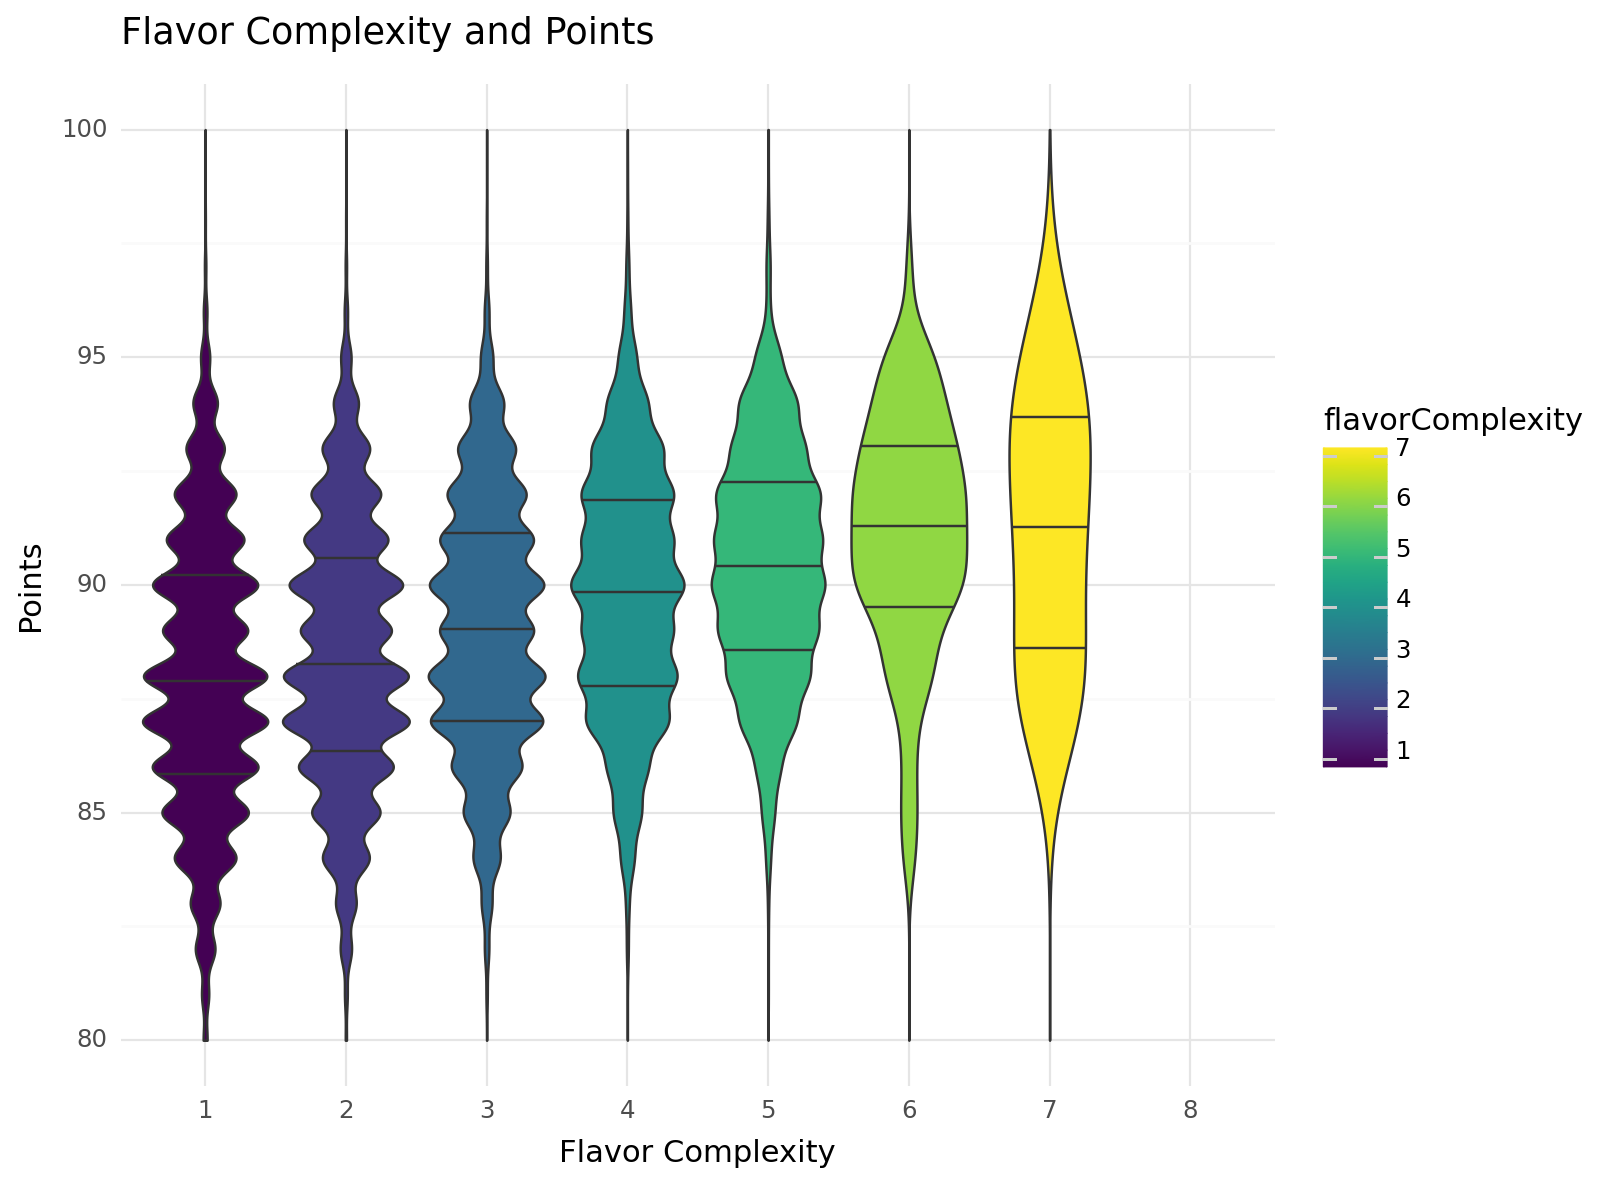

<Figure Size: (800 x 600)>

In [234]:
from plotnine import (
    ggplot,
    aes,
    labs,
    geom_violin,
    theme,
    theme_minimal,
    ggtitle,
)

ggplot(recommenderdf, aes('factor(flavorComplexity)', 'points')) + geom_violin(aes(fill = 'flavorComplexity'), trim = False,draw_quantiles=(0.25, 0.5, 0.75)
) +labs(x = "Flavor Complexity", y = "Points")+theme_minimal() + ggtitle("Flavor Complexity and Points")+ theme(figure_size=(8, 6))